<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

## _*Getting Started with Qiskit*_ 

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
#### Contributors
Jay Gambetta[1], Ismael Faro[1], Andrew Cross[1], Ali Javadi[1]

#### Affiliation
* [1] IBM Q* 

## Qiskit

This tutorial aims to explain how to use Qiskit. We assume you have installed Qiskit if not please look at [qiskit.org](http://www.qiskit.org) or the install [documentation](https://github.com/qiskit/qiskit-tutorial/blob/master/INSTALL.md). 

Qiskit is a software development kit that you can use to create your quantum computing programs based on circuits and execute them on several backends (real quantum processors online, simulators online, and simulators on local). For the online backends we used [IBM Q](http://quantumexperience.ng.bluemix.net/) real quantum computers.

First lets start by importing the import features of Qiskit.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute

The basic concept of Qiskit is an array of quantum circuits. The workflow consists of two stages: [Build](#sectionB), and [Execute](#sectionR). Build allows you to make different quantum circuits that represent the problem you are solving; Execute allows you to run them to run on different backends.  After the jobs have been run, the data is collected. There are methods for putting this data together, depending on the program. This either gives you the answer you wanted, or allows you to make a better program for the next instance.

## Building your circuit: Create it  <a id='sectionB'></a>

The basic elements needed for your first program are the QuantumCircuit, QuantumRegister, and ClassicalRegister.

In [2]:
# Create a Quantum Register called "q" with 3 qubits
qr = QuantumRegister(3)

# Create a Classical Register called "c" with 3 bits
cr = ClassicalRegister(3)

# Create a Quantum Circuit called involving "qr" and "cr"
circuit = QuantumCircuit(qr, cr)

After you create the circuit with its registers, you can add gates to manipulate the registers. As you proceed though the tutorial you will find more quantum gates and circuits but the below is an example of the quantum half adder.

In [3]:
# Not gate on qubit 0
circuit.x(qr[0])

# Not gate on qubit 1
circuit.x(qr[1])

# Toffoli gate from qubit 0,1 to qubit 2
circuit.ccx(qr[0], qr[1], qr[2])

# CNOT (Controlled-NOT) gate from qubit 0 to qubit 1
circuit.cx(qr[0], qr[1])

# measure gate from qr to cr
circuit.measure(qr, cr)

## Visualize Circuit

You can visualize your circuit using Qiskit's `circuit_drawer`, which plots the unrolled circuit in the specified basis.

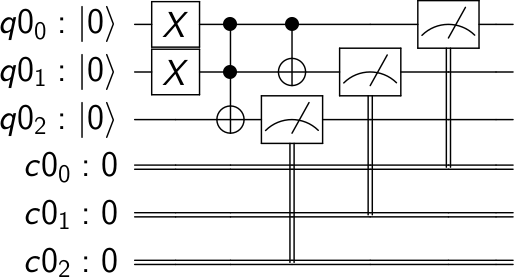

In [4]:
from qiskit.tools.visualization import circuit_drawer

circuit_drawer(circuit)

## Execute <a id='sectionE'></a>

First we need to choose the backend. Lets start with the simulator provided by the Qiskit Aer element 

In [5]:
from qiskit import Aer
backend = Aer.get_backend('qasm_simulator')

Next we need to run the circuit

In [6]:
# Create a Quantum Program for execution 
job = execute(circuit, backend)

Execute compiles and runs the circuits

```
execute(name_of_circuits=None, backend=backend, config=None, basis_gates=None, coupling_map=None, initial_layout=None, shots=1024, max_credits=3, seed=None, qobj_id=None, hpc=None, skip_translation=False)
```

(**Tip**: You can obtain the above parameters in Jupyter. Simply place the text cursor on a function and press Shift+Tab)

When you run a program a job object is made that has the following two useful methods

```
job.status()
```
returns the status of the job

```
job.result()
``` 
returns the job result object

In [7]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [8]:
result = job.result()

## Result
Once you have a results object you can access the counts via the function 

```get_counts(circuit)```. 

This gives you the binary outcomes of the circuit you have run.

In [9]:
result.get_counts(circuit)

{'101': 1024}

## Execute on a Real Device

This is the important part of Qiskit. You can use it to run your circuits on real quantum computers using the IBMQ provider. They are small and noisy but are advancing at a fast pace. In the next tutorial we will go into more details about the provider but for now we will outline the basic functions. 

In [10]:
from qiskit import IBMQ

and then calling

`IBMQ.save_account('MY_TOKEN')`

that will store your IBMQ credentials in a local file.  Unless your registration information has changed, you only need to do this once.  You may now (or in any other tutorial) load your accounts 

In [11]:
IBMQ.load_accounts()

We choose a device with the least queue which can support our program (has at least 3 qubits).

In [12]:
from qiskit.backends.ibmq import least_busy

large_enough_devices = IBMQ.backends(filters=lambda x: x.configuration()['n_qubits'] > 3 and not x.configuration()['simulator'])
backend = least_busy(large_enough_devices)
print("the best backend is " + backend.name())

the best backend is ibmq_20_tokyo


To help user using we have provided some simple functions that only work in jupyter. These are activated using 

In [13]:
from qiskit.wrapper.jupyter import *

In [14]:
%%qiskit_job_status
shots = 1024           # Number of shots to run the program (experiment); maximum is 8192 shots.
max_credits = 3          # Maximum number of credits to spend on executions. 

job_exp = execute(circuit, backend=backend, shots=shots, max_credits=max_credits)

In [15]:
result_real = job_exp.result()

Like before, the counts from the execution can be obtained using ```get_counts(circuit)``` 

In [16]:
result_real.get_counts(circuit)

{'000': 6,
 '001': 121,
 '010': 15,
 '011': 38,
 '100': 63,
 '101': 554,
 '110': 51,
 '111': 176}

## Retrieving a job

The job ID can be obtained using the following which you can use later to get the job if your experiment takes longer to run then you have time to wait around.

In [17]:
jobID = job_exp.job_id()

print('JOB ID: {}'.format(jobID))        

JOB ID: 5bbaa2895f176e00431bcb8a


The job can be gotten from the backend using retrieve_job

In [18]:
job_get=backend.retrieve_job(jobID)

and then the results can be obtained from the new job object. 

In [19]:
job_get.result().get_counts(circuit)

{'000': 6,
 '001': 121,
 '010': 15,
 '011': 38,
 '100': 63,
 '101': 554,
 '110': 51,
 '111': 176}